<a href="https://colab.research.google.com/github/Patrick4350/OIBSIP/blob/main/Iris_flower_classifications.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/Patrick4350/OIBSIP.git

Cloning into 'OIBSIP'...
remote: Enumerating objects: 34, done.
remote: Counting objects: 100% (34/34), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 34 (delta 9), reused 5 (delta 1), pack-reused 0
Receiving objects: 100% (34/34), 177.17 KiB | 939.00 KiB/s, done.
Resolving deltas: 100% (9/9), done.


In [ ]:
!git clone https://github.com/Patrick4350/OIBSIP.git


fatal: destination path 'OIBSIP' already exists and is not an empty directory.


In [ ]:
cd OIBSIP/


/content/OIBSIP


In [ ]:
%%writefile iris.py

Writing iris.py


In [200]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier



#Data Elements Overview and Description



In [201]:
file_url = 'https://raw.githubusercontent.com/Patrick4350/OIBSIP/main/Iris.csv'
df = pd.read_csv(file_url)
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [203]:
#Number of null data elements
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

No empty cell in the dataset

In [204]:
#Checking for duplicate data
df.duplicated().sum()

0

In [205]:
#Adding a new column to easily identify species
species_to_target = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
df['species_target'] = df['Species'].map(species_to_target)


There are no duplicates in this dataset

In [206]:
#Description of dataset
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,species_target
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667,1.000000
std,43.445368,0.828066,0.433594,1.764420,0.763161,0.819232
min,1.000000,4.300000,2.000000,1.000000,0.100000,0.000000
25%,38.250000,5.100000,2.800000,1.600000,0.300000,0.000000
50%,75.500000,5.800000,3.000000,4.350000,1.300000,1.000000
75%,112.750000,6.400000,3.300000,5.100000,1.800000,2.000000
max,150.000000,7.900000,4.400000,6.900000,2.500000,2.000000


# Distributions of flower features

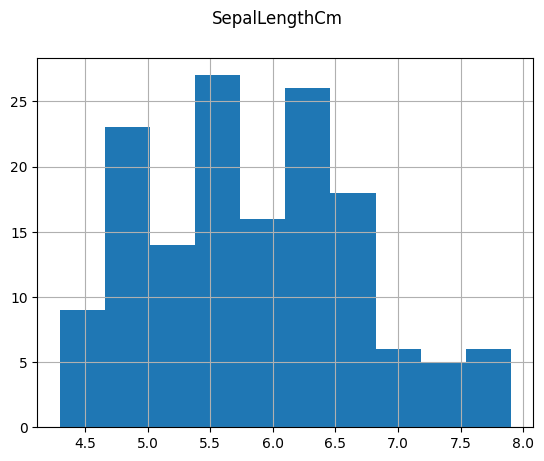

In [207]:
#Histogram of the sepal length
col = 'SepalLengthCm'
df[col].hist()
plt.suptitle(col)
plt.show()

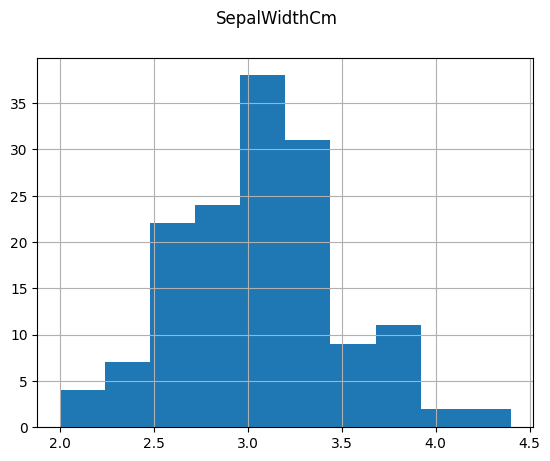

In [208]:
#Histogram of the sepal width
col = 'SepalWidthCm'
df[col].hist()
plt.suptitle(col)
plt.show()

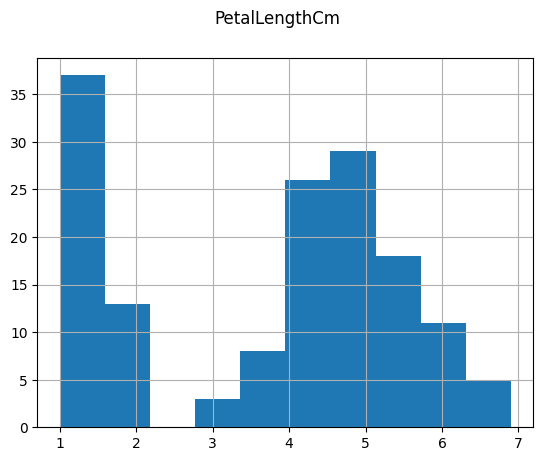

In [209]:
#Histogram of the petal length
col = 'PetalLengthCm'
df[col].hist()
plt.suptitle(col)
plt.show()

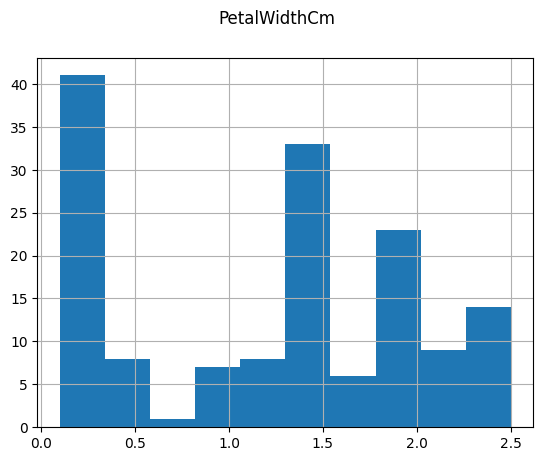

In [210]:
#Histogram of the petal width
col = 'PetalWidthCm'
df[col].hist()
plt.suptitle(col)
plt.show()

In [211]:
#The distinct species names in the data
unique_species = df['Species'].unique()
print(unique_species)


['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


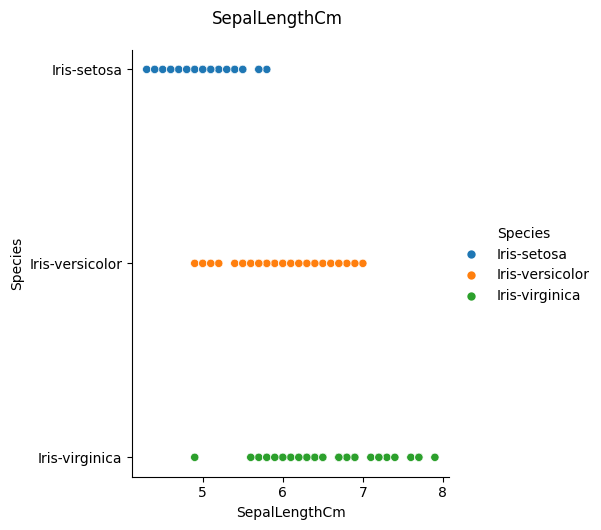

In [212]:
#Relational plot of the sepal length per species
col = 'SepalLengthCm'
sns.relplot(x=col, y='Species', hue='Species', data=df)
plt.suptitle(col, y=1.05)
plt.show()

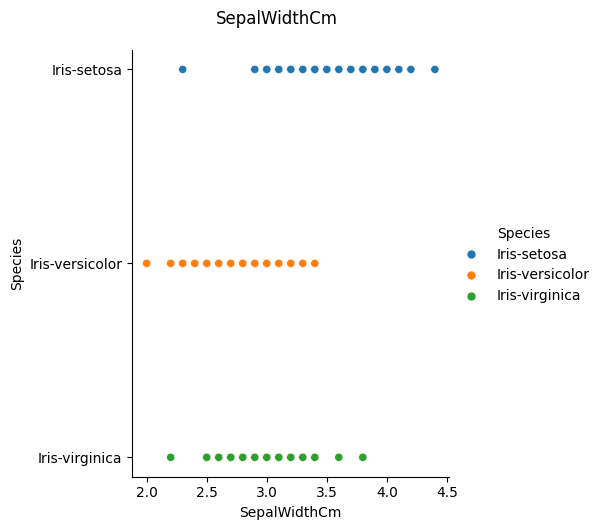

In [213]:
#Relational plot of the sepal width per species
col = 'SepalWidthCm'
sns.relplot(x=col, y='Species', hue='Species', data=df)
plt.suptitle(col, y=1.05)
plt.show()

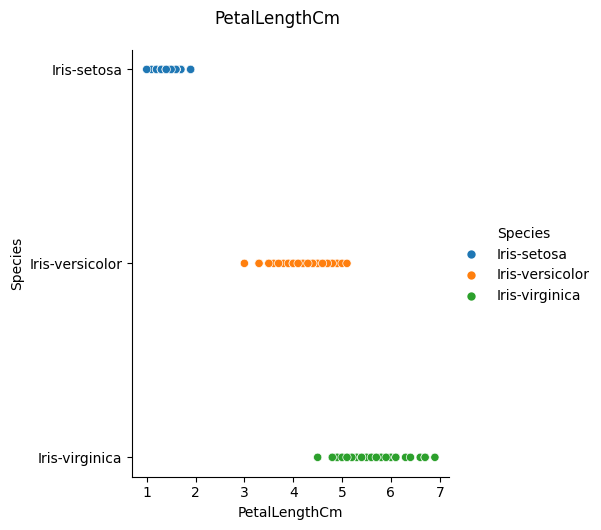

In [214]:
#Relational plot of the petal length per species
col = 'PetalLengthCm'
sns.relplot(x=col, y='Species', hue='Species', data=df)
plt.suptitle(col, y=1.05)
plt.show()

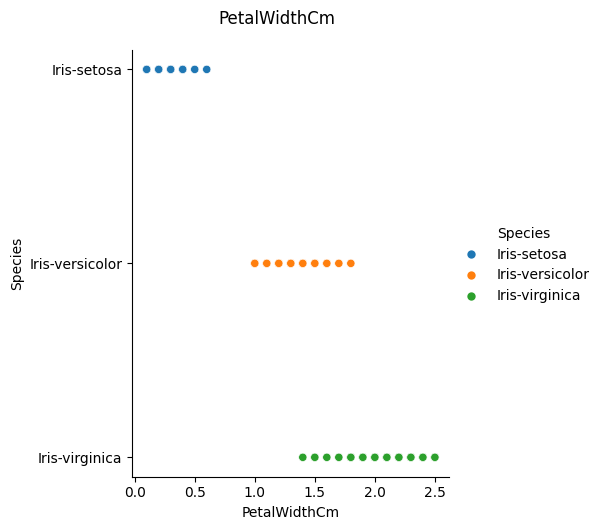

In [215]:
#Relational plot of the petal width per species
col = 'PetalWidthCm'
sns.relplot(x=col, y='Species', hue='Species', data=df)
plt.suptitle(col, y=1.05)
plt.show()

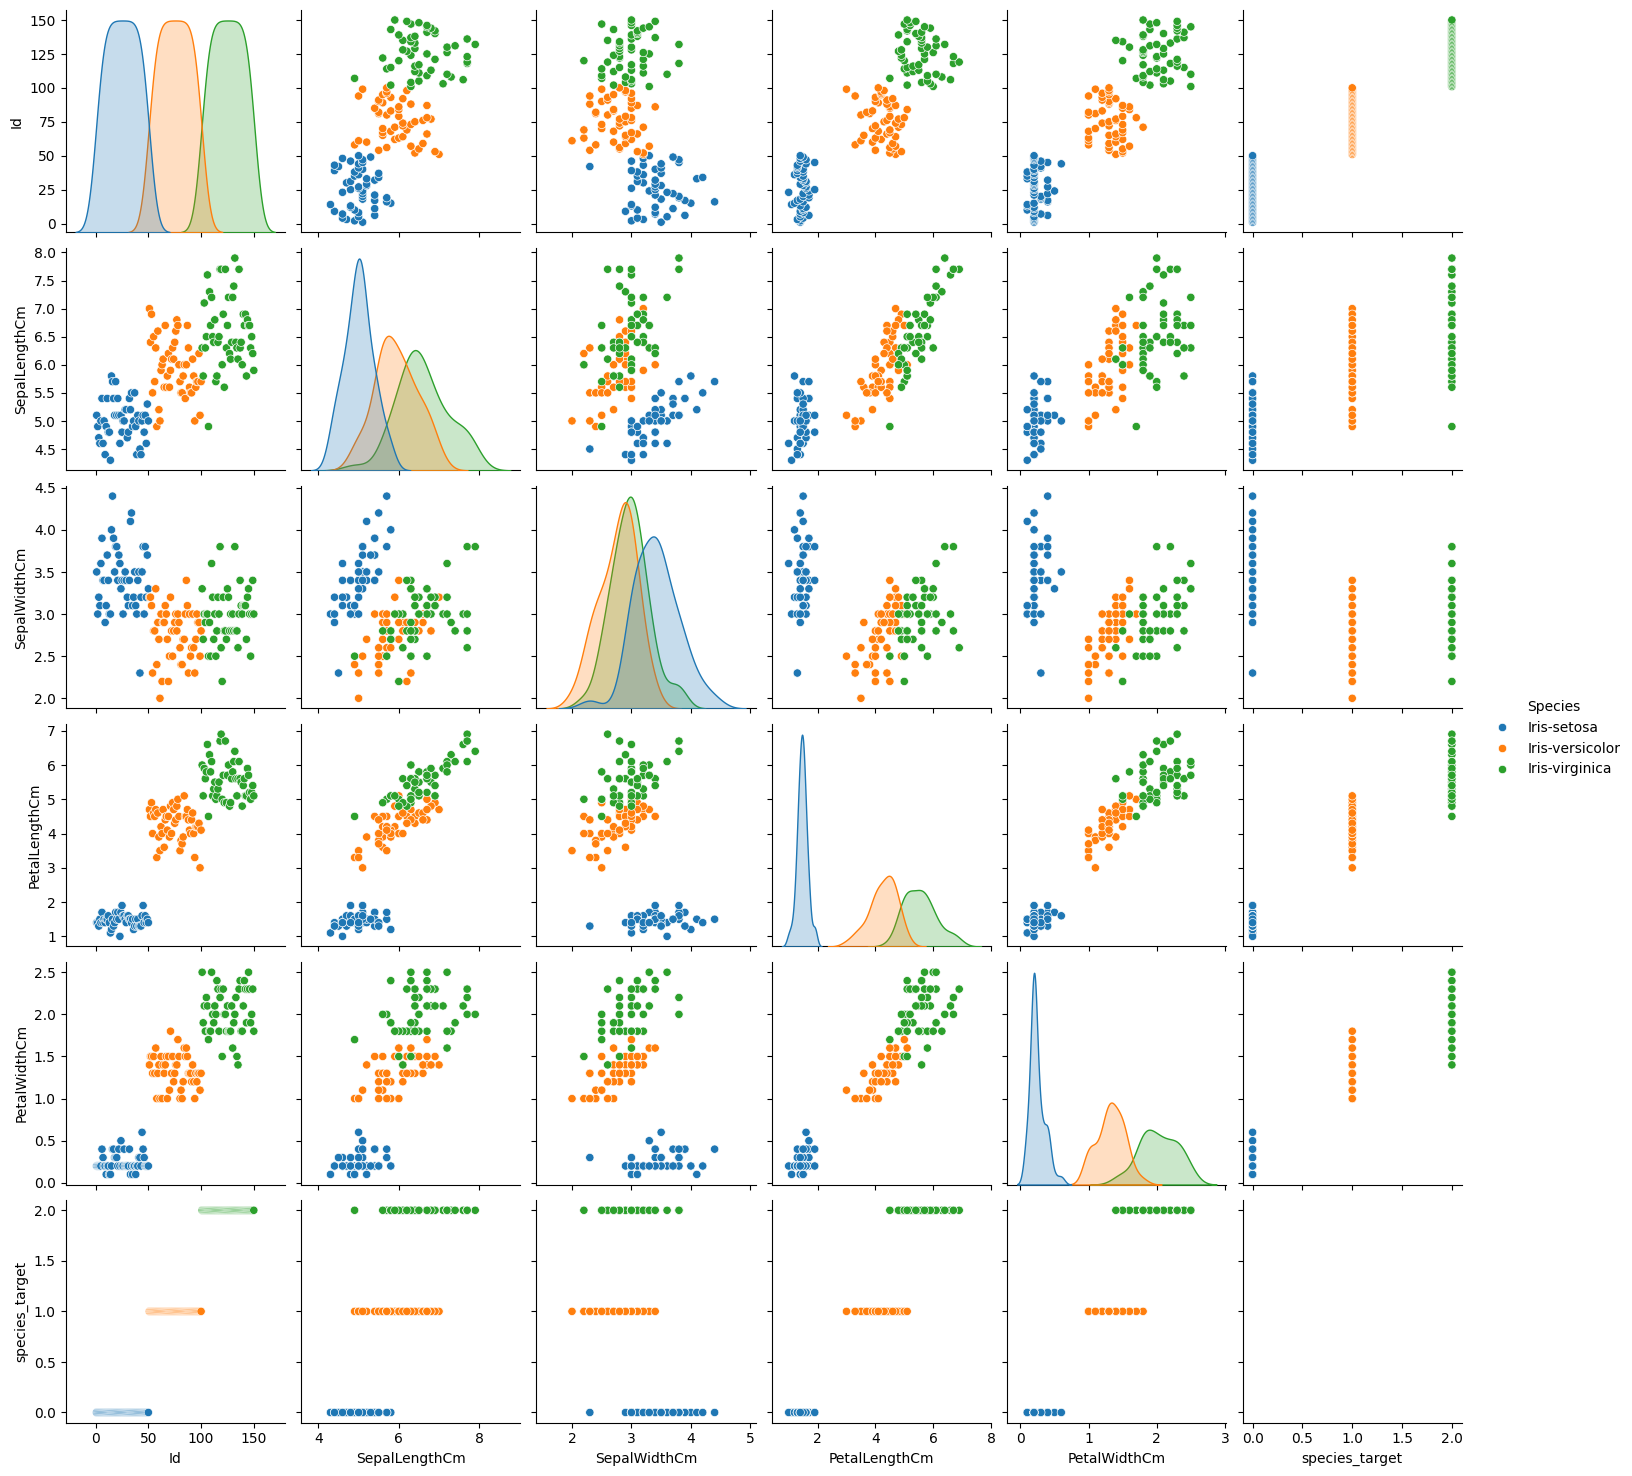

In [216]:
sns.pairplot(df, hue='Species')

#Train test split


In [217]:
df_train, df_test = train_test_split(df, test_size = 0.25)

In [218]:
df_train.shape

(112, 7)

In [219]:
df_test.shape

(38, 7)

In [220]:
df_train.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,species_target
53,54,5.5,2.3,4.0,1.3,Iris-versicolor,1
117,118,7.7,3.8,6.7,2.2,Iris-virginica,2
44,45,5.1,3.8,1.9,0.4,Iris-setosa,0
43,44,5.0,3.5,1.6,0.6,Iris-setosa,0
63,64,6.1,2.9,4.7,1.4,Iris-versicolor,1


#Data preparation for modeling

In [221]:
x_train = df_train.drop(['Species', 'Id', 'species_target'], axis=1).values
y_train = df_train['species_target'].values

In [222]:
x_train

array([[5.5, 2.3, 4. , 1.3],
       [7.7, 3.8, 6.7, 2.2],
       [5.1, 3.8, 1.9, 0.4],
       [5. , 3.5, 1.6, 0.6],
       [6.1, 2.9, 4.7, 1.4],
       [5.8, 2.8, 5.1, 2.4],
       [6.3, 3.4, 5.6, 2.4],
       [4.9, 3. , 1.4, 0.2],
       [6.4, 2.8, 5.6, 2.2],
       [6.6, 2.9, 4.6, 1.3],
       [6.3, 2.3, 4.4, 1.3],
       [7.2, 3. , 5.8, 1.6],
       [4.8, 3. , 1.4, 0.1],
       [4.5, 2.3, 1.3, 0.3],
       [6.5, 3. , 5.2, 2. ],
       [4.8, 3. , 1.4, 0.3],
       [6. , 2.2, 5. , 1.5],
       [6.6, 3. , 4.4, 1.4],
       [6.1, 3. , 4.9, 1.8],
       [4.4, 3.2, 1.3, 0.2],
       [5.7, 2.5, 5. , 2. ],
       [4.6, 3.4, 1.4, 0.3],
       [5.7, 3. , 4.2, 1.2],
       [6.2, 2.9, 4.3, 1.3],
       [5.6, 2.7, 4.2, 1.3],
       [7.2, 3.2, 6. , 1.8],
       [4.8, 3.4, 1.6, 0.2],
       [4.9, 2.5, 4.5, 1.7],
       [5.6, 3. , 4.1, 1.3],
       [6.9, 3.2, 5.7, 2.3],
       [4.4, 3. , 1.3, 0.2],
       [5.7, 2.6, 3.5, 1. ],
       [5.4, 3.9, 1.3, 0.4],
       [6.4, 2.8, 5.6, 2.1],
       [7.1, 3

In [223]:
y_train

array([1, 2, 0, 0, 1, 2, 2, 0, 2, 1, 1, 2, 0, 0, 2, 0, 2, 1, 2, 0, 2, 0,
       1, 1, 1, 2, 0, 2, 1, 2, 0, 1, 0, 2, 2, 1, 0, 1, 0, 1, 0, 2, 0, 2,
       2, 2, 0, 0, 2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 0, 2, 2, 2,
       0, 2, 0, 0, 2, 0, 1, 1, 0, 1, 2, 1, 0, 2, 0, 1, 0, 2, 2, 0, 2, 2,
       1, 1, 2, 0, 2, 0, 1, 0, 1, 0, 0, 1, 1, 2, 2, 1, 2, 0, 0, 2, 1, 1,
       0, 1])

#Modeling - Baseline

Since the species types are balanced, the model accuracy for guessing species is 1/3 or 33%. Therefore, our model accuracy should be at least  33%

#Manual model
Using plots to get cuttoffs for species features

In [224]:
#Predict the iris specis given the petal length
def petal_length_feature_prediction(petal_length):
  if petal_length < 2.5:
    return 0
  elif petal_length < 4.8:
    return 1
  else:
    return 2




In [225]:
df_train.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species', 'species_target'],
      dtype='object')

In [226]:
petal_length_values = x_train[:, 2]
petal_length_values

array([4. , 6.7, 1.9, 1.6, 4.7, 5.1, 5.6, 1.4, 5.6, 4.6, 4.4, 5.8, 1.4,
       1.3, 5.2, 1.4, 5. , 4.4, 4.9, 1.3, 5. , 1.4, 4.2, 4.3, 4.2, 6. ,
       1.6, 4.5, 4.1, 5.7, 1.3, 3.5, 1.3, 5.6, 5.9, 4.5, 1.3, 3.9, 1.5,
       4.7, 1.5, 5.3, 1.4, 5.1, 5.5, 5. , 1.5, 1.6, 6. , 5.5, 1.4, 1.5,
       3.9, 4. , 4.5, 4.4, 4. , 3.3, 5.4, 3.9, 3.5, 1.4, 1.5, 5.8, 5.5,
       4.8, 1.4, 5.9, 1.4, 1.6, 4.9, 1.5, 4.8, 4.4, 1.5, 3.8, 5.1, 3.3,
       1.4, 6.6, 1.3, 4. , 1. , 6.3, 5.6, 1.5, 5.1, 5.6, 4.5, 3. , 4.9,
       1.7, 5.4, 1.5, 4.2, 1.6, 4. , 1.1, 1.5, 4.5, 4.9, 5.1, 5.6, 4.6,
       5.7, 1.6, 1.4, 5.1, 3.7, 4.1, 1.7, 4.7])

In [227]:
manual_y_predictions = np.array([petal_length_feature_prediction(p_length) for p_length in petal_length_values])


In [228]:
#Accuracy based on manual prediction
manual_model_accuracy = np.mean(manual_y_predictions == y_train)

In [229]:
print(f"Manuel model accuracy: {manual_model_accuracy * 100:.2f}%")

Manuel model accuracy: 97.32%


#Modeling - Logistic Regression

Using a validation set for module evaluation

In [230]:
model = LogisticRegression(max_iter=200)

In [231]:
#xt = X_train data, #xv = X_validation data
xt, xv, yt, yv = train_test_split(x_train, y_train, test_size = 0.25)

In [232]:
model.fit(xt, yt)

LogisticRegression(max_iter=200)

In [233]:
y_predict = model.predict(xv)

In [234]:
np.mean(y_predict == yv)

1.0

In [235]:
model.score(xv, yv)

1.0

#Cross validation for model evaluation

In [236]:
model = LogisticRegression(max_iter=200)

In [237]:
cross_val_acc = cross_val_score(model, x_train, y_train, cv=5, scoring = "accuracy")

In [238]:
np.mean(cross_val_acc)

0.982213438735178

#Checking for misclassified points

In [239]:
cross_y_pred = cross_val_predict(model, x_train, y_train, cv=5)

In [240]:
mask_predicted_correct = cross_y_pred == y_train

In [241]:
mask_not_predicted_correct = ~mask_predicted_correct

In [242]:
#Number of inaccurate predictions
x_train[mask_not_predicted_correct]

array([[4.9, 2.5, 4.5, 1.7],
       [5.9, 3.2, 4.8, 1.8]])

In [243]:
df_predictions = df_train.copy()

In [244]:
df_predictions['Accurate Predictions'] = mask_predicted_correct

In [245]:
df_predictions['Predictions'] = cross_y_pred

In [246]:
df_predictions['Prediction Label'] = df_predictions['Predictions'].map({0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'})

In [247]:
incorrect_predictions = df_predictions[df_predictions['Accurate Predictions'] == False]

<Axes: xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

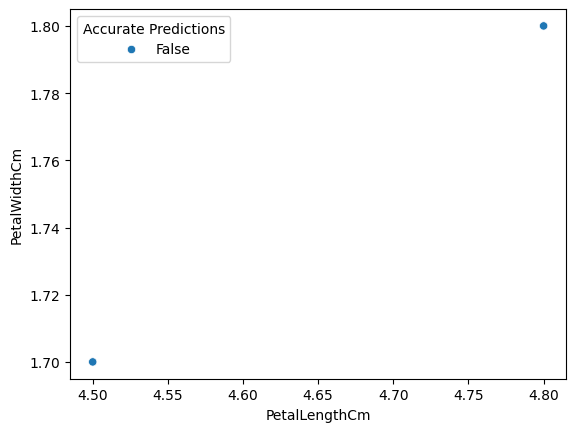

In [248]:
#Plotting data values where predictions were inaccurate
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm', hue = 'Accurate Predictions', data=incorrect_predictions)

#Model Tuning

In [249]:
#Ramdonly testing for values of c with the best accuracy
for reg_strength in [5, 5.3, 5.9, 6, 6.5]:
  print(reg_strength)
  model = LogisticRegression(max_iter=200, C = reg_strength)
  accuracies = cross_val_score(model, x_train, y_train, cv=5, scoring = "accuracy")
  print(f"Accuracy: {np.mean(accuracies) * 100:.2f}%")

5
Accuracy: 98.22%
5.3
Accuracy: 98.22%
5.9
Accuracy: 98.22%
6
Accuracy: 98.22%
6.5
Accuracy: 98.22%


#Final Model

In [ ]:
model = LogisticRegression(max_iter=200, C = 5)

#Evaluation of model using the test set

In [ ]:
x_test = df_test.drop(['Species', 'Id', 'species_target'], axis=1).values
y_test = df_test['species_target'].values

In [ ]:
x_test.shape

(38, 4)

In [ ]:
y_test

array([2, 0, 0, 0, 2, 0, 0, 1, 2, 0, 0, 2, 0, 0, 1, 2, 1, 0, 2, 2, 2, 0,
       0, 1, 0, 2, 0, 1, 1, 2, 1, 0, 1, 2, 1, 0, 2, 0])

#Training final mode using full training dataset

In [ ]:
model.fit(x_train, y_train)

LogisticRegression(C=5, max_iter=200)

In [ ]:
y_test_predict = model.predict(x_test)

In [ ]:
test_accurate = (y_test_predict == y_test)
print(f"Test set accuracy: {np.mean(test_accurate) * 100:.2f}%")

Test set accuracy: 100.00%


The model accurately predict the values for unseen data (test train) 100% of the time.

In [ ]:
df_predictions_test = df_test.copy()
df_predictions_test['Accurate Predictions'] = test_accurate
df_predictions_test['Predictions'] = y_test_predict
df_predictions_test['Prediction Label'] = df_predictions_test['Predictions'].map({0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'})

In [ ]:
accurate_predictions_num = (df_predictions_test['Accurate Predictions'] == True).sum()
print(f"Number of accurate predictions: {accurate_predictions_num}")


Number of accurate predictions: 38


All the 38 test set data points were correctly predicted.

#Conclusion

In conclusion, this model achieved 100% accuracy on the dataset using the Logistic Regression model with these parameters:


LogisticRegression(C=5, max_iter=200)